# using new dataset  

In [16]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [17]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, roc_curve, auc, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import VotingRegressor, StackingRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import datetime 
import holidays
from statsmodels.tsa.stattools import pacf
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler

# suppressing warnings
import warnings
warnings.filterwarnings("ignore")

In [18]:
data = pd.read_csv('data/merged_cleaned_processed.csv')
data

,Unnamed: 0,date,location,year,mmwr_week,covid_19_deaths,distributed,distributed_janssen,distributed_moderna,distributed_pfizer,...,month,region_East,region_Midwest,region_Puerto Rico,region_South,region_West,season_Fall,season_Spring,season_Summer,season_Winter
0,0,2020-01-04,AL,2020,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,1
1,1,2020-01-04,LA,2020,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,1
2,2,2020-01-04,VA,2020,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,1
3,3,2020-01-04,KY,2020,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,1
4,4,2020-01-04,KS,2020,1,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,8944,2024-01-06,OH,2024,1,23.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,1
8945,8945,2024-01-06,NY,2024,1,145.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,1
8946,8946,2024-01-06,NJ,2024,1,39.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,1
8947,8947,2024-01-06,NH,2024,1,12.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,1


In [19]:
missing_vals = data.isnull().sum()
missing_df = pd.DataFrame({'feature': missing_vals.index, 'num_missing': missing_vals.values})
missing_df.sort_values(by = ['num_missing'], ascending = False)

,feature,num_missing
90,second_booster,8949
105,bivalent_booster_5plus_pop_pct,7679
104,bivalent_booster_5plus,7679
111,bivalent_booster_65plus_pop_pct,7636
107,bivalent_booster_12plus_pop_pct,7636
...,...,...
5,covid_19_deaths,0
4,mmwr_week,0
3,year,0
2,location,0


In [20]:
data = data.drop([ 'second_booster_50plus_vax_pct',
 'second_booster_65plus_vax_pct',
 'additional_doses_5plus_vax_pct',
 'bivalent_booster_12plus_pop_pct',
 'bivalent_booster_18plus_pop_pct',
 'bivalent_booster_5plus_pop_pct',
 'bivalent_booster_65plus_pop_pct', 'Unnamed: 0'], axis=1)

In [21]:
data['date'] = pd.DatetimeIndex(data['date'])
data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month

data

,date,location,year,mmwr_week,covid_19_deaths,distributed,distributed_janssen,distributed_moderna,distributed_pfizer,distributed_novavax,...,month,region_East,region_Midwest,region_Puerto Rico,region_South,region_West,season_Fall,season_Spring,season_Summer,season_Winter
0,2020-01-04,AL,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,1
1,2020-01-04,LA,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,1
2,2020-01-04,VA,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,1
3,2020-01-04,KY,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,1
4,2020-01-04,KS,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,2024-01-06,OH,2024,1,23.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,1
8945,2024-01-06,NY,2024,1,145.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,1
8946,2024-01-06,NJ,2024,1,39.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,1
8947,2024-01-06,NH,2024,1,12.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,1


In [22]:
univariate_df = data[['date', 'covid_19_deaths']]
univariate_df = univariate_df.set_index('date')

univariate_combined = data[['date', 'covid_19_deaths']]
univariate_combined = univariate_combined.groupby('date').sum()
data = univariate_combined.groupby('date').sum()
data

,covid_19_deaths
date,
2020-01-04,0.0
2020-01-11,0.0
2020-01-18,0.0
2020-01-25,0.0
2020-02-01,0.0
...,...
2023-12-09,1634.0
2023-12-16,1598.0
2023-12-23,1456.0


# Prophet - Univariate 

Importing plotly failed. Interactive plots will not work.
15:42:14 - cmdstanpy - INFO - Chain [1] start processing
15:42:14 - cmdstanpy - INFO - Chain [1] done processing


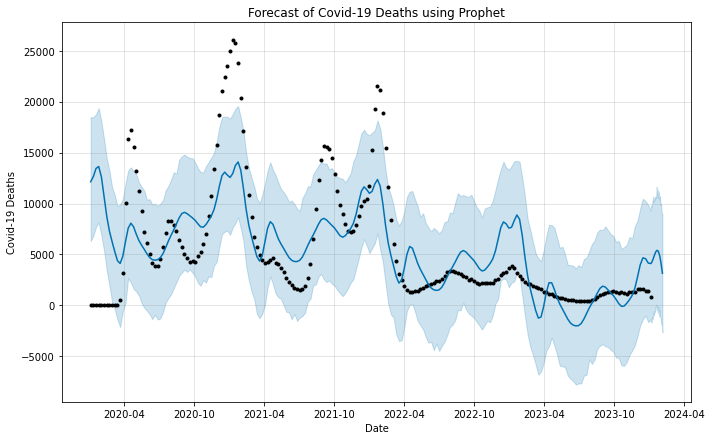

In [8]:
#using univariate data 
from prophet import Prophet

# Assuming 'data' contains your dataset with a DateTime index and a column named 'covid_19_deaths'
# If not, replace 'covid_19_deaths' with the actual column name of your time series variable
data_prophet = univariate_combined.reset_index()  # Reset index to use 'ds' as the time column
data_prophet = data_prophet.rename(columns={'date': 'ds', 'covid_19_deaths': 'y'})  # Rename columns for Prophet

# Initialize Prophet model
model = Prophet()

# Fit the model to the data
model.fit(data_prophet)

# Define future dates for prediction
future_dates = model.make_future_dataframe(periods=30)  # Forecast for 30 days into the future

# Make predictions
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Covid-19 Deaths')
plt.title('Forecast of Covid-19 Deaths using Prophet')
plt.show()

# Arima

Mean Squared Error: 662416.9643889995


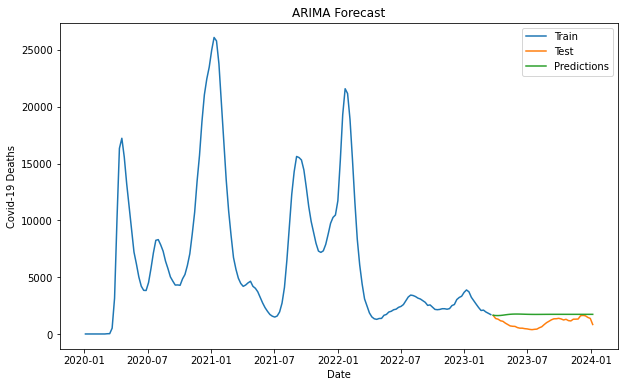

In [9]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'data' contains your dataset with a DateTime index and a column named 'covid_19_deaths'
# If not, replace 'covid_19_deaths' with the actual column name of your time series variable
# Ensure that the index is a DateTimeIndex
data.index = pd.to_datetime(data.index)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)  # 80% train, 20% test
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train_data['covid_19_deaths'], order=(5,1,0))  # Example order (p, d, q)
fitted_model = model.fit()

# Make predictions
predictions = fitted_model.forecast(steps=len(test_data))

# Evaluate the model
mse = mean_squared_error(test_data['covid_19_deaths'], predictions)
print("Mean Squared Error:", mse)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['covid_19_deaths'], label='Train')
plt.plot(test_data.index, test_data['covid_19_deaths'], label='Test')
plt.plot(test_data.index, predictions, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Covid-19 Deaths')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

In [25]:
#Arima2
best_mse = float('inf')
best_order = None

for p in range(3):
    for d in range(2):
        for q in range(3):
            try:
                model = ARIMA(train_data['covid_19_deaths'], order=(p, d, q))
                fitted_model = model.fit()
                predictions = fitted_model.forecast(steps=len(test_data))
                mse = mean_squared_error(test_data['covid_19_deaths'], predictions)
                if mse < best_mse:
                    best_mse = mse
                    best_order = (p, d, q)
            except:
                continue

print("Best Order:", best_order)
print("Best MSE:", best_mse)

Best Order: (1, 1, 1)
Best MSE: 147252.1903571906


In [26]:
#Arima3
best_mse = float('inf')
best_order = None
best_seasonal_order = None

for p in range(3):
    for d in range(2):
        for q in range(3):
            for P in range(3):
                for D in range(2):
                    for Q in range(3):
                        try:
                            model = ARIMA(train_data['covid_19_deaths'], order=(p, d, q), seasonal_order=(P, D, Q, 12))
                            fitted_model = model.fit()
                            predictions = fitted_model.forecast(steps=len(test_data))
                            mse = mean_squared_error(test_data['covid_19_deaths'], predictions)
                            if mse < best_mse:
                                best_mse = mse
                                best_order = (p, d, q)
                                best_seasonal_order = (P, D, Q)
                        except:
                            continue

print("Best Order:", best_order)
print("Best Seasonal Order:", best_seasonal_order)
print("Best MSE:", best_mse)

Best Order: (0, 1, 1)
Best Seasonal Order: (2, 0, 1)
Best MSE: 141186.51903958974


In [27]:
#Arima4
best_mse = float('inf')
best_order = None
best_seasonal_order = None

for p in range(3):
    for d in range(2):
        for q in range(3):
            for P in range(3):
                for D in range(2):
                    for Q in range(3):
                        try:
                            model = ARIMA(train_data['covid_19_deaths'], order=(p, d, q), seasonal_order=(P, D, Q, 12))
                            fitted_model = model.fit()
                            predictions = fitted_model.forecast(steps=len(test_data))
                            mse = mean_squared_error(test_data['covid_19_deaths'], predictions)
                            if mse < best_mse:
                                best_mse = mse
                                best_order = (p, d, q)
                                best_seasonal_order = (P, D, Q)
                        except:
                            continue

print("Best Order:", best_order)
print("Best Seasonal Order:", best_seasonal_order)
print("Best MSE:", best_mse)

Best Order: (0, 1, 1)
Best Seasonal Order: (2, 0, 1)
Best MSE: 141186.51903958974


# AutoArima

In [10]:
pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
from pmdarima import auto_arima

# Use auto_arima to automatically select the best ARIMA model
model = auto_arima(data, seasonal=True, m=12)  # Example assuming monthly seasonal data (m=12)

# Print the summary of the best model
print(model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  210
Model:             SARIMAX(1, 1, 3)x(1, 0, [], 12)   Log Likelihood               -1609.045
Date:                             Thu, 08 Feb 2024   AIC                           3230.090
Time:                                     16:08:01   BIC                           3250.144
Sample:                                 01-04-2020   HQIC                          3238.198
                                      - 01-06-2024                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4381      0.084      5.185      0.000       0.272       0.604
ma.L1          1.0823      